<a href="https://colab.research.google.com/github/dibiersanchez/Fase-I-Cocreacion-Dibier-Sanchez/blob/main/Cocreacion2Dibier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sodapy

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

od.download("https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: "dibier.sanchez"
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data


100%|██████████| 84.7M/84.7M [00:01<00:00, 48.9MB/s]


In [ ]:
csvFile = pd.read_csv('./climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
print(csvFile)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Å

In [ ]:
df_clima = pd.DataFrame.from_records(csvFile)
print(df_clima)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Å

In [ ]:
# Filtrar las filas correspondientes a Colombia
df_colombia = df_clima[df_clima['Country'] == 'Colombia']

# Mostrar el DataFrame con información solo de Colombia
print(df_colombia)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
409839   1825-01-01              22.596                          1.992   
409840   1825-02-01              22.124                          1.662   
409841   1825-03-01              22.196                          1.920   
409842   1825-04-01              22.554                          1.941   
409843   1825-05-01              21.399                          1.226   
...             ...                 ...                            ...   
8042137  2013-05-01              24.870                          0.351   
8042138  2013-06-01              24.805                          0.379   
8042139  2013-07-01              24.292                          0.363   
8042140  2013-08-01              24.578                          0.375   
8042141  2013-09-01                 NaN                            NaN   

                  City   Country Latitude Longitude  
409839         Armenia  Colombia    4.02N    76.34W  
409

In [ ]:
df_region = df_colombia[df_colombia['City'].isin(['Tunja', 'Bogotá'])]
data=pd.DataFrame.from_records(df_region)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1020512,1824-01-01,20.116,1.370,Bogotá,Colombia,4.02N,74.73W
1020513,1824-02-01,19.797,2.109,Bogotá,Colombia,4.02N,74.73W
1020514,1824-03-01,20.044,1.548,Bogotá,Colombia,4.02N,74.73W
1020515,1824-04-01,19.766,1.786,Bogotá,Colombia,4.02N,74.73W
1020516,1824-05-01,19.555,1.371,Bogotá,Colombia,4.02N,74.73W


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4554 entries, 1020512 to 7809443
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             4554 non-null   object 
 1   AverageTemperature             4095 non-null   float64
 2   AverageTemperatureUncertainty  4095 non-null   float64
 3   City                           4554 non-null   object 
 4   Country                        4554 non-null   object 
 5   Latitude                       4554 non-null   object 
 6   Longitude                      4554 non-null   object 
dtypes: float64(2), object(5)
memory usage: 413.7+ KB


In [ ]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [ ]:
data['AverageTemperature'].replace(True, None, inplace = True)
data['AverageTemperature'].replace(False, None, inplace = True)
data['AverageTemperature'].fillna(data['AverageTemperature'].notnull(), inplace = True)
data['AverageTemperature'].unique()

array([20.116, 19.797, 20.044, ..., 20.699, 20.113, 19.796], dtype=object)

In [ ]:
import pandas as pd

data['AverageTemperature'].replace('20.116', 20.11, inplace=True)
data['AverageTemperature'].replace('19.797', 19.79, inplace=True)
data['AverageTemperature'].replace('20.044', 20.04, inplace=True)

data['AverageTemperature'] = data['AverageTemperature'].astype('float')

print("Datos nulos restantes: " + str(data['AverageTemperature'].isna().sum()))

data['AverageTemperature'].fillna(data['AverageTemperature'].mean(), inplace=True)
print("Datos nulos: " + str(data['AverageTemperature'].isna().sum()))
print("Media de exp: " + str(data['AverageTemperature'].mean()))

min_non_zero = data[data['AverageTemperature'] != 0]['AverageTemperature'].min()
data['AverageTemperature'].replace(0, min_non_zero, inplace=True)


Datos nulos restantes: 0
Datos nulos: 0
Media de exp: 17.70156038647343


array([20.116, 19.797, 20.044, ..., 20.699, 20.113, 19.796])

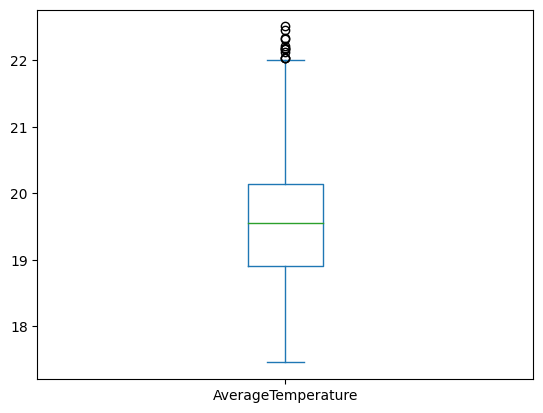

In [ ]:
data['AverageTemperature'].plot.box()
data['AverageTemperature'].unique()

<Axes: ylabel='Frequency'>

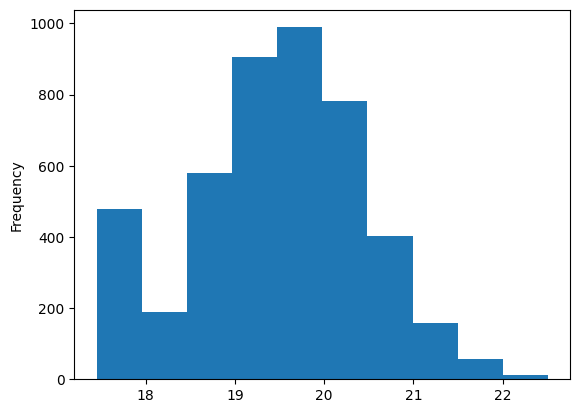

In [ ]:
data['AverageTemperature'].plot.hist()

In [ ]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [ ]:
data['AverageTemperatureUncertainty'].replace(True, None, inplace = True)
data['AverageTemperatureUncertainty'].replace(False, None, inplace = True)
data['AverageTemperatureUncertainty'].fillna(data['AverageTemperatureUncertainty'].notnull(), inplace = True)
data['AverageTemperatureUncertainty'].unique()

array([1.37, 2.109, 1.548, ..., 0.145, 0.5820000000000001, 0.701],
      dtype=object)

In [ ]:
data['AverageTemperatureUncertainty'].replace('0.5820000000000001', 0.58, inplace = True)
data['AverageTemperatureUncertainty'].replace('2.109', 2.11, inplace = True)
data['AverageTemperatureUncertainty'].replace('1.548', 1.55, inplace = True)
data['AverageTemperatureUncertainty'].replace('0.701', 0.70, inplace = True)

data['AverageTemperatureUncertainty'] = data['AverageTemperatureUncertainty'].astype('float')

print("Datos nulos restantes: "+ str(data['AverageTemperatureUncertainty'].isna().sum()))

data['AverageTemperatureUncertainty'].fillna(data['AverageTemperatureUncertainty'].mean(), inplace = True)
print("Datos nulos: "+ str(data['AverageTemperatureUncertainty'].isna().sum()))
print("Media de exp: "+ str(data['AverageTemperatureUncertainty'].mean()))

Datos nulos restantes: 0
Datos nulos: 0
Media de exp: 0.6390267896354852


array([1.37 , 2.109, 1.548, ..., 0.145, 0.582, 0.701])

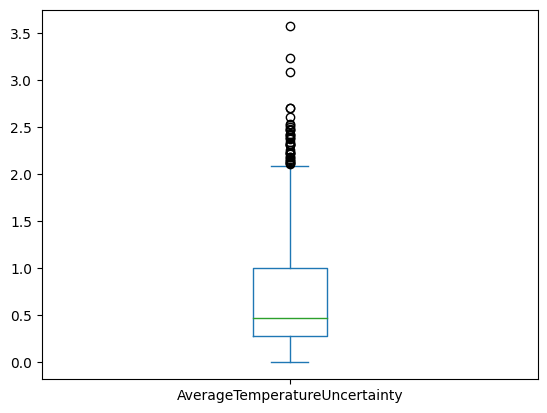

In [ ]:
data['AverageTemperatureUncertainty'].plot.box()
data['AverageTemperatureUncertainty'].unique()

<Axes: ylabel='Frequency'>

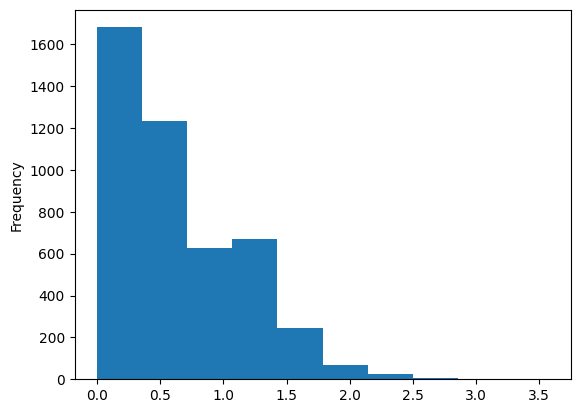

In [ ]:
data['AverageTemperatureUncertainty'].plot.hist()

In [ ]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

Cual es la temperatura más alta que se tiene?

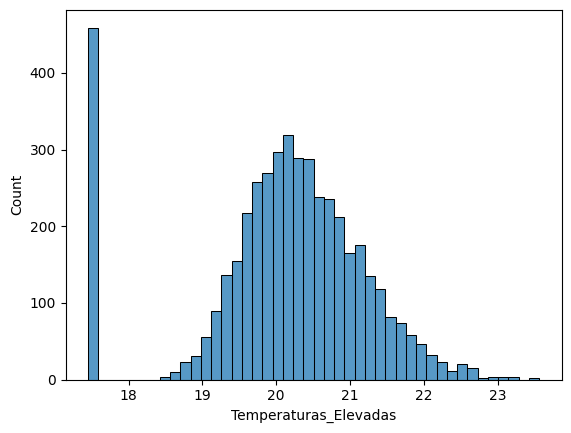

In [ ]:
import seaborn as sns
data['Temperaturas_Elevadas'] = data['AverageTemperatureUncertainty'] + data['AverageTemperature']
sns.histplot(data['Temperaturas_Elevadas'])
plt.show()


La temperatura "AverageTemperature" tiene relación con la ciudad ?


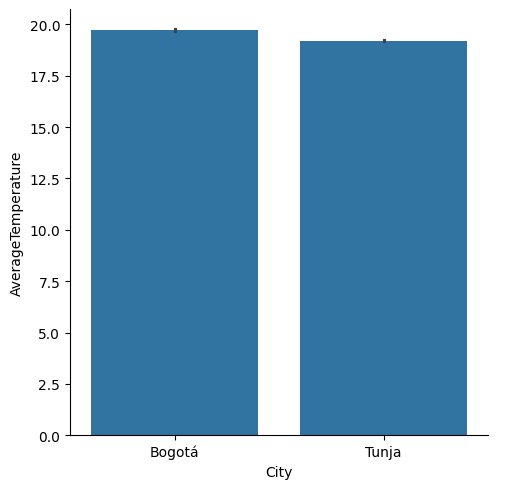

In [ ]:
from pandas.core.groupby.groupby import DataFrame
import seaborn as sns

sns.catplot(data=data, x="City", y="AverageTemperature", kind="bar")

La temperatura "AverageTemperatureUncertainty" tiene relación con la ciudad?

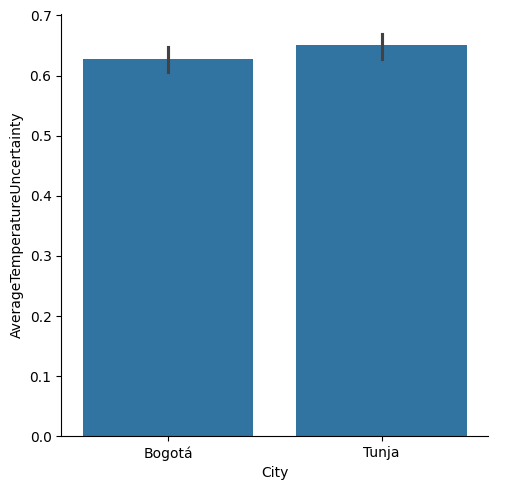

In [ ]:
from pandas.core.groupby.groupby import DataFrame
import seaborn as sns

sns.catplot(data=data, x="City", y="AverageTemperatureUncertainty", kind="bar")

In [ ]:
# Ver las columnas del dataframe
print(data.columns)

# Obtener estadísticas descriptivas
print(data.describe())

# Verificar valores faltantes
print(data.isnull().sum())

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'Temperaturas_Elevadas'],
      dtype='object')
       AverageTemperature  AverageTemperatureUncertainty  \
count         4554.000000                    4554.000000   
mean            19.460758                       0.639027   
std              1.004431                       0.496614   
min             17.454000                       0.000000   
25%             18.898000                       0.277000   
50%             19.550500                       0.477500   
75%             20.142750                       1.006750   
max             22.508000                       3.570000   

       Temperaturas_Elevadas  
count            4554.000000  
mean               20.099785  
std                 1.153313  
min                17.454000  
25%                19.642000  
50%                20.207000  
75%                20.816750  
max                23.559000  
dt           

In [ ]:
import pandas as pd

# Convertir la columna 'dt' a tipo datetime
data['dt'] = pd.to_datetime(data['dt'])

# Calcular el número de días desde una fecha de referencia
fecha_referencia = pd.Timestamp('1800-01-01')
data['dias_desde_referencia'] = (data['dt'] - fecha_referencia).dt.days

# Ahora, 'dias_desde_referencia' es un número entero que representa la fecha en días


Gráfica de la temperatura media en función del tiempo, específicamente desde una fecha de referencia, la temperatura media muestra una tendencia general a aumentar y disminuir con el tiempo. Una tendencia ascendente puede indicar un calentamiento global, mientras que una tendencia descendente podría sugerir enfriamiento.

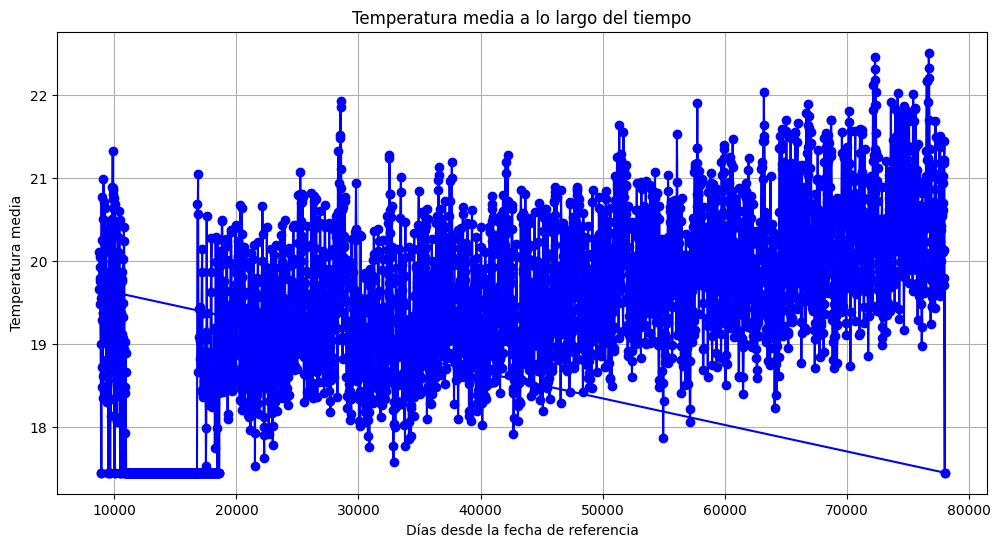

In [ ]:
import matplotlib.pyplot as plt

# Graficar la temperatura media en función de los días desde la fecha de referencia
plt.figure(figsize=(12, 6))
plt.plot(data['dias_desde_referencia'], data['AverageTemperature'], marker='o', linestyle='-', color='b')
plt.xlabel('Días desde la fecha de referencia')
plt.ylabel('Temperatura media')
plt.title('Temperatura media a lo largo del tiempo')
plt.grid(True)
plt.show()


Histograma con una curva de densidad de la temperatura media. Las alturas de las barras indican la frecuencia de ocurrencia de diferentes rangos de temperatura. Las barras más altas representan las temperaturas más comunes.

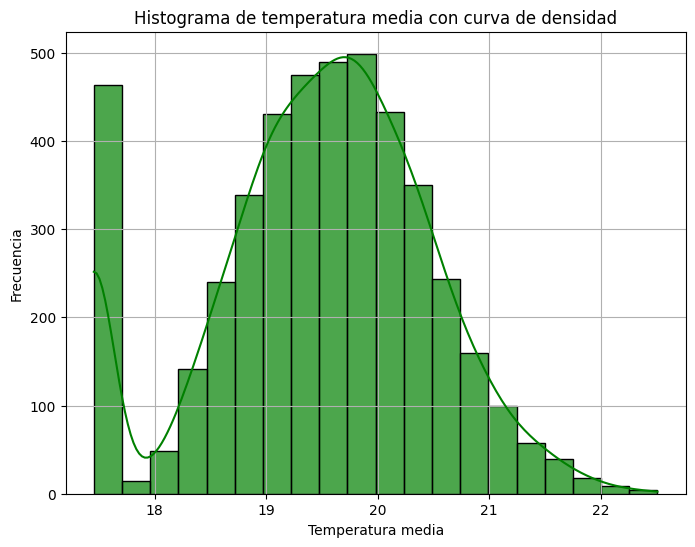

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['AverageTemperature'], bins=20, kde=True, color='green', alpha=0.7)
plt.xlabel('Temperatura media')
plt.ylabel('Frecuencia')
plt.title('Histograma de temperatura media con curva de densidad')
plt.grid(True)
plt.show()



La descomposición estacional de la temperatura media, se divide en la serie temporal en tres componentes principales: la tendencia, la estacionalidad y el residuo. En este podemos observar por parte de la tendencia que la temperatura media está manteniéndose constante a lo largo del tiempo, la componente residual representa cero fluctuaciones.


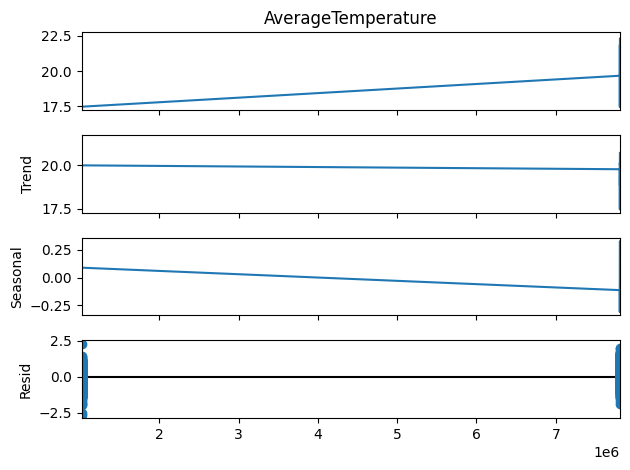

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional
descomposicion = seasonal_decompose(data['AverageTemperature'], model='additive', period=12)
descomposicion.plot()
plt.show()


In [ ]:
import numpy as np

# Calcular la media de la temperatura
media_temperatura = np.mean(data['AverageTemperature'])

# Calcular la desviación estándar de la temperatura
std_temperatura = np.std(data['AverageTemperature'])

print(f"Media de la temperatura: {media_temperatura}")
print(f"Desviación estándar de la temperatura: {std_temperatura}")


Media de la temperatura: 19.46075801493193
Desviación estándar de la temperatura: 1.0043202454004083


Temperatura promedio en Colombia, y Departamento de Cundinamarca y Boyacá.

In [ ]:
# Agrupar por país y calcular la temperatura promedio
temperatura_por_pais = data.groupby('Country')['AverageTemperature'].mean()
print(temperatura_por_pais)

# Agrupar por ciudad y calcular la temperatura promedio
temperatura_por_ciudad = data.groupby('City')['AverageTemperature'].mean()
print(temperatura_por_ciudad)


Country
Colombia    19.460758
Name: AverageTemperature, dtype: float64
City
Bogotá    19.712409
Tunja     19.209107
Name: AverageTemperature, dtype: float64


# ALGORITMO DE BFD

In [ ]:
import pandas as pd
import numpy as np

# Supongamos que tu dataset está en el DataFrame 'data'
# Convertir 'AverageTemperature' a tipo numérico
data['AverageTemperature'] = pd.to_numeric(data['AverageTemperature'], errors='coerce')

# Eliminar filas con valores NaN en 'AverageTemperature'
data = data.dropna(subset=['AverageTemperature'])

# Extraer las temperaturas medias como una lista
temperatures = data['AverageTemperature'].tolist()

# Definir la capacidad del contenedor (por ejemplo, 10 grados)
bin_capacity = 10

# Implementar el algoritmo BFD
def best_fit_decreasing(items, bin_capacity):
    # Ordenar los elementos en orden decreciente
    items = sorted(items, reverse=True)

    # Lista de contenedores, cada uno representado por el espacio disponible restante
    bins = []

    # Iterar sobre cada elemento
    for item in items:
        # Buscar el mejor contenedor (el que deje el menor espacio libre)
        best_bin = None
        min_space_left = float('inf')

        for i in range(len(bins)):
            space_left = bins[i] - item
            if space_left >= 0 and space_left < min_space_left:
                best_bin = i
                min_space_left = space_left

        # Si encontramos un contenedor adecuado, colocamos el elemento en él
        if best_bin is not None:
            bins[best_bin] -= item
        else:
            # Si no encontramos un contenedor adecuado, creamos uno nuevo
            bins.append(bin_capacity - item)

    # El número de contenedores utilizados es el tamaño de la lista de contenedores
    return len(bins)

# Aplicar el algoritmo BFD a las temperaturas
num_bins = best_fit_decreasing(temperatures, bin_capacity)
print(f'Número de contenedores necesarios: {num_bins}')


Número de contenedores necesarios: 4554


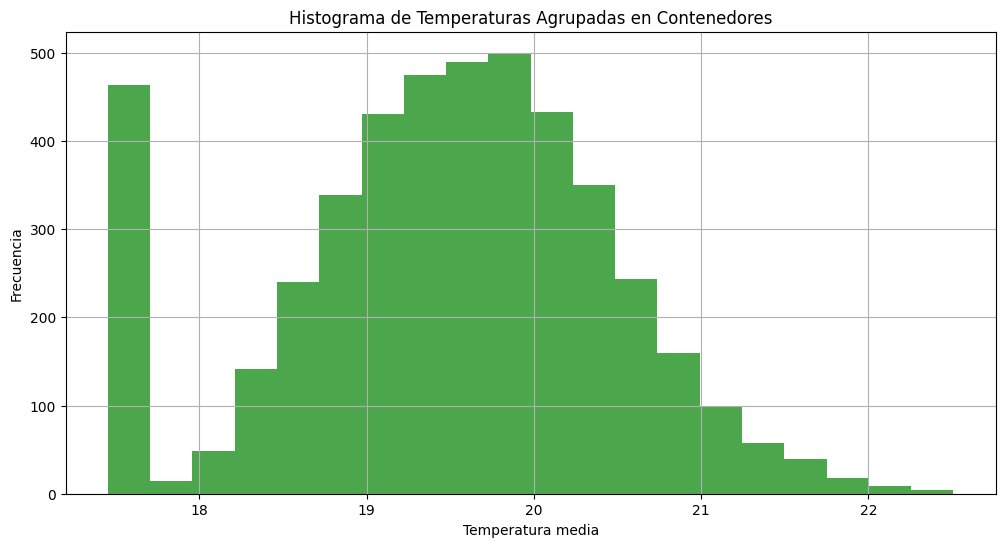

In [ ]:
# Crear un histograma de la distribución de temperaturas agrupadas en contenedores

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['AverageTemperature'] = pd.to_numeric(data['AverageTemperature'], errors='coerce')

data = data.dropna(subset=['AverageTemperature'])

temperatures = data['AverageTemperature'].tolist()

bin_capacity = 10

def best_fit_decreasing_with_bins(items, bin_capacity):
    items = sorted(items, reverse=True)
    bins = []
    for item in items:
        best_bin = None
        min_space_left = float('inf')

        for i in range(len(bins)):
            space_left = bins[i][0] - item
            if space_left >= 0 and space_left < min_space_left:
                best_bin = i
                min_space_left = space_left

        if best_bin is not None:
            bins[best_bin][0] -= item
            bins[best_bin][1].append(item)
        else:
            bins.append([bin_capacity - item, [item]])

    return bins

bins = best_fit_decreasing_with_bins(temperatures, bin_capacity)

all_bins = [item for b in bins for item in b[1]]

plt.figure(figsize=(12, 6))
plt.hist(all_bins, bins=20, color='green', alpha=0.7)
plt.xlabel('Temperatura media')
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperaturas Agrupadas en Contenedores')
plt.grid(True)
plt.show()

# ALGORITMO DFS

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Supongamos que tu dataset está en el DataFrame 'data'
# Convertir 'AverageTemperature' a tipo numérico
data['AverageTemperature'] = pd.to_numeric(data['AverageTemperature'], errors='coerce')

# Eliminar filas con valores NaN en 'AverageTemperature' y 'City'
data = data.dropna(subset=['AverageTemperature', 'City'])

# Crear un grafo donde los nodos son ciudades y las aristas representan temperaturas similares
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def dfs(self, v, visited):
        visited.add(v)
        print(v, end=' ')
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.dfs(neighbour, visited)

# Inicializar el grafo
g = Graph()

# Definir un umbral para considerar que dos temperaturas son similares
temperature_threshold = 1.0  # Puedes ajustar este valor según tus necesidades

# Agrupar por ciudades y obtener el promedio de temperaturas por ciudad
city_temperatures = data.groupby('City')['AverageTemperature'].mean()

# Crear las aristas del grafo basado en el umbral de temperatura
cities = city_temperatures.index.tolist()
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        if abs(city_temperatures[cities[i]] - city_temperatures[cities[j]]) <= temperature_threshold:
            g.add_edge(cities[i], cities[j])
            g.add_edge(cities[j], cities[i])

# Verificar las conexiones
print("Conexiones en el grafo:")
for city in g.graph:
    print(f"{city} -> {g.graph[city]}")


Conexiones en el grafo:
Bogotá -> ['Tunja']
Tunja -> ['Bogotá']


In [ ]:
# Definir una función para ejecutar DFS desde una ciudad inicial
def run_dfs(graph, start_city):
    visited = set()
    print(f"DFS desde {start_city}:")
    graph.dfs(start_city, visited)
    print()

# Ejecutar DFS desde una ciudad inicial específica
start_city = 'Bogotá'  # Cambia esto por la ciudad desde la cual quieres iniciar
run_dfs(g, start_city)
# Definir una función para ejecutar DFS desde una ciudad inicial
def run_dfs(graph, start_city):
    visited = set()
    print(f"DFS desde {start_city}:")
    graph.dfs(start_city, visited)
    print()

# Ejecutar DFS desde una ciudad inicial específica
start_city = 'Bogotá'  # Cambia esto por la ciudad desde la cual quieres iniciar
run_dfs(g, start_city)


DFS desde Bogotá:
Bogotá Tunja 
DFS desde Bogotá:
Bogotá Tunja 


In [ ]:
def find_connected_components(graph):
    visited = set()
    components = []

    for city in graph.graph:
        if city not in visited:
            component = []
            stack = [city]
            while stack:
                node = stack.pop()
                if node not in visited:
                    visited.add(node)
                    component.append(node)
                    stack.extend(set(graph.graph[node]) - visited)
            components.append(component)

    return components

# Encontrar y mostrar los componentes conexos
components = find_connected_components(g)
print("Componentes conexos:")
for i, component in enumerate(components):
    print(f"Componente {i + 1}: {component}")


Componentes conexos:
Componente 1: ['Bogotá', 'Tunja']


In [ ]:
def has_cycle(graph, v, visited, parent):
    visited.add(v)
    for neighbour in graph.graph[v]:
        if neighbour not in visited:
            if has_cycle(graph, neighbour, visited, v):
                return True
        elif parent is not None and neighbour != parent:
            return True
    return False

# Verificar si el grafo tiene ciclos
def contains_cycle(graph):
    visited = set()
    for city in graph.graph:
        if city not in visited:
            if has_cycle(graph, city, visited, None):
                return True
    return False

# Comprobar y mostrar si el grafo contiene ciclos
if contains_cycle(g):
    print("El grafo contiene ciclos.")
else:
    print("El grafo no contiene ciclos.")


El grafo no contiene ciclos.


In [ ]:
def find_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if start not in graph.graph:
        return None
    for node in graph.graph[start]:
        if node not in path:
            new_path = find_path(graph, node, end, path)
            if new_path:
                return new_path
    return None

# Buscar un camino entre dos ciudades específicas
start_city = 'Bogotá'  # Cambia esto según tus necesidades
end_city = 'Tunja'     # Cambia esto según tus necesidades
path = find_path(g, start_city, end_city)

if path:
    print(f"Camino desde {start_city} hasta {end_city}: {path}")
else:
    print(f"No hay camino desde {start_city} hasta {end_city}.")


Camino desde Bogotá hasta Tunja: ['Bogotá', 'Tunja']


In [ ]:
def topological_sort_util(v, visited, stack, graph):
    visited.add(v)
    for neighbour in graph.graph[v]:
        if neighbour not in visited:
            topological_sort_util(neighbour, visited, stack, graph)
    stack.insert(0, v)

def topological_sort(graph):
    visited = set()
    stack = []
    for city in graph.graph:
        if city not in visited:
            topological_sort_util(city, visited, stack, graph)
    return stack

# Realizar la clasificación topológica si no hay ciclos
if not contains_cycle(g):
    topo_sort = topological_sort(g)
    print("Clasificación topológica del grafo:")
    print(topo_sort)
else:
    print("No se puede realizar la clasificación topológica debido a la presencia de ciclos.")


Clasificación topológica del grafo:
['Bogotá', 'Tunja']


# ALGORITMO A*

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import heapq

# Supongamos que tu dataset está en el DataFrame 'data'
# Convertir 'AverageTemperature' a tipo numérico
data['AverageTemperature'] = pd.to_numeric(data['AverageTemperature'], errors='coerce')

# Eliminar filas con valores NaN en 'AverageTemperature' y 'City'
data = data.dropna(subset=['AverageTemperature', 'City'])

# Crear un grafo donde los nodos son ciudades y las aristas representan temperaturas similares
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, cost):
        self.graph[u].append((v, cost))

# Inicializar el grafo
g = Graph()

# Definir un umbral para considerar que dos temperaturas son similares
temperature_threshold = 1.0  # Puedes ajustar este valor según tus necesidades

# Agrupar por ciudades y obtener el promedio de temperaturas por ciudad
city_temperatures = data.groupby('City')['AverageTemperature'].mean()

# Crear las aristas del grafo basado en el umbral de temperatura
cities = city_temperatures.index.tolist()
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        temp_diff = abs(city_temperatures[cities[i]] - city_temperatures[cities[j]])
        if temp_diff <= temperature_threshold:
            g.add_edge(cities[i], cities[j], temp_diff)
            g.add_edge(cities[j], cities[i], temp_diff)

# Verificar las conexiones
print("Conexiones en el grafo:")
for city in g.graph:
    print(f"{city} -> {g.graph[city]}")


Conexiones en el grafo:
Bogotá -> [('Tunja', 0.5033025911286799)]
Tunja -> [('Bogotá', 0.5033025911286799)]


In [ ]:
def heuristic(city1, city2):
    # Usamos la diferencia absoluta de temperaturas medias como heurística
    return abs(city_temperatures[city1] - city_temperatures[city2])

def a_star_search(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {city: float('inf') for city in city_temperatures.index}
    g_score[start] = 0
    f_score = {city: float('inf') for city in city_temperatures.index}
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Retorna el camino al revés (de start a goal)

        for neighbor, cost in graph.graph[current]:
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Ejecutar la búsqueda A* desde una ciudad inicial hasta una ciudad objetivo
start_city = 'Bogotá'  # Cambia esto por la ciudad desde la cual quieres iniciar
goal_city = 'Tunja'    # Cambia esto por la ciudad a la cual quieres llegar

path = a_star_search(g, start_city, goal_city)

if path:
    print(f"Camino desde {start_city} hasta {goal_city}: {path}")
else:
    print(f"No se encontró un camino desde {start_city} hasta {goal_city}.")


Camino desde Bogotá hasta Tunja: ['Bogotá', 'Tunja']


In [ ]:
# Aplicamos un preprocesamiento de los datos, donde se cambiara el tipo de datos para los campos o columnas
# que lo requieran.

# Convertir las columnas 'latitud' y 'longitud' a numérico
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Mirar los cambios del dataframe segmentado de nombreestacion, latitud y longitud para el departamento seleccionado.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4554 entries, 1020512 to 7809443
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             4554 non-null   datetime64[ns]
 1   AverageTemperature             4554 non-null   float64       
 2   AverageTemperatureUncertainty  4554 non-null   float64       
 3   City                           4554 non-null   object        
 4   Country                        4554 non-null   object        
 5   Latitude                       0 non-null      float64       
 6   Longitude                      0 non-null      float64       
 7   Temperaturas_Elevadas          4554 non-null   float64       
 8   dias_desde_referencia          4554 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 484.8+ KB


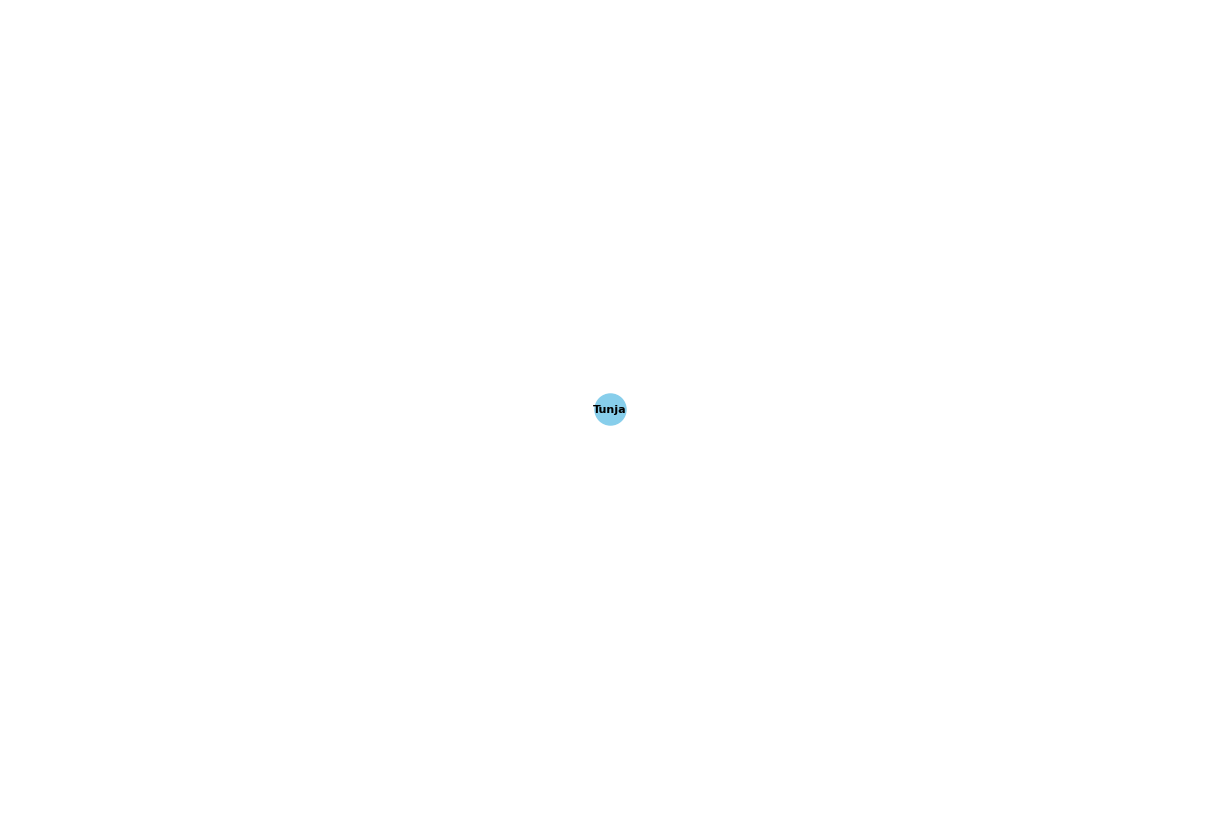

In [ ]:
# Importamos las librerias para el grafo
import networkx as nx
import matplotlib.pyplot as plt
import random

# Creamos un grafo vacio y lo llenamos de manera dinamica con los nodos
# donde estos nodos representaran los nombres de las estaciones

G_temperaturas = nx.Graph()

# Forma de hacerlo por medio de un ciclo repetitivo
for estacion in data['City']:
  G_temperaturas.add_node(city)

# Mostrar solo los nodos creados de esta manera.
plt.figure(figsize=(12, 8)) # Tamaño del lienzo que se usara para mostrar la visualización.
nx.draw(G_temperaturas, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')
plt.show()


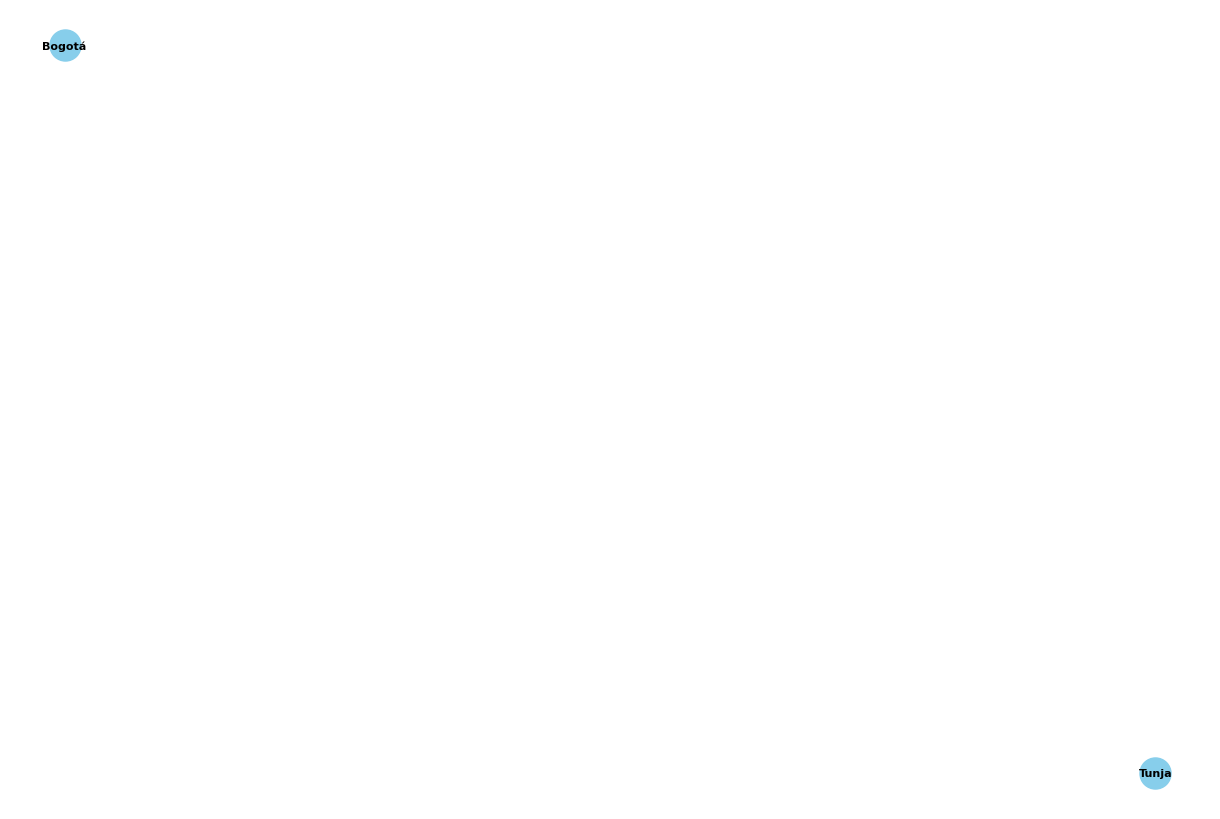

In [ ]:
# Eliminar los nodos creados
G_temperaturas.clear()

# Forma de hacerlo por medio de funcion de nxnetwork
G_temperaturas.add_nodes_from(data['City'])

# Mostrar solo los nodos creados de esta manera.
plt.figure(figsize=(12, 8)) # Tamaño del lienzo que se usara para mostrar la visualización.
nx.draw(G_temperaturas, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')
plt.show()

In [ ]:
# Ya con nuestro grafo con nodos, nos queda crear las conexiones entre ellos de manera aleatoria.
# donde cada nodo representa el nombre de una estacion.

lista_nodos:list = list(G_temperaturas.nodes)

for nodo in lista_nodos:
  # Si el nodo no posee conexiones o lados, crea una conexion.
  if G_temperaturas.degree(nodo) == 0:
    # Obtengo un indice de manera aleatoria, que esta entre 0 al tamaño de nodos existentes.
    indice_nodo_a_conectar:int = random.randint(0, len(G_temperaturas.nodes)-1)
    # Por medio del indice obtengo el nodo que se usara en la conexion.
    nodo_a_conectar = lista_nodos[indice_nodo_a_conectar]
    # Establezco la conexion entre el nodo actual con el obtenido de manera aleatoria. Les doy un valor inicial del atributo distancia de 0.0
    G_temperaturas.add_edge(nodo, nodo_a_conectar, distancia=0.0)

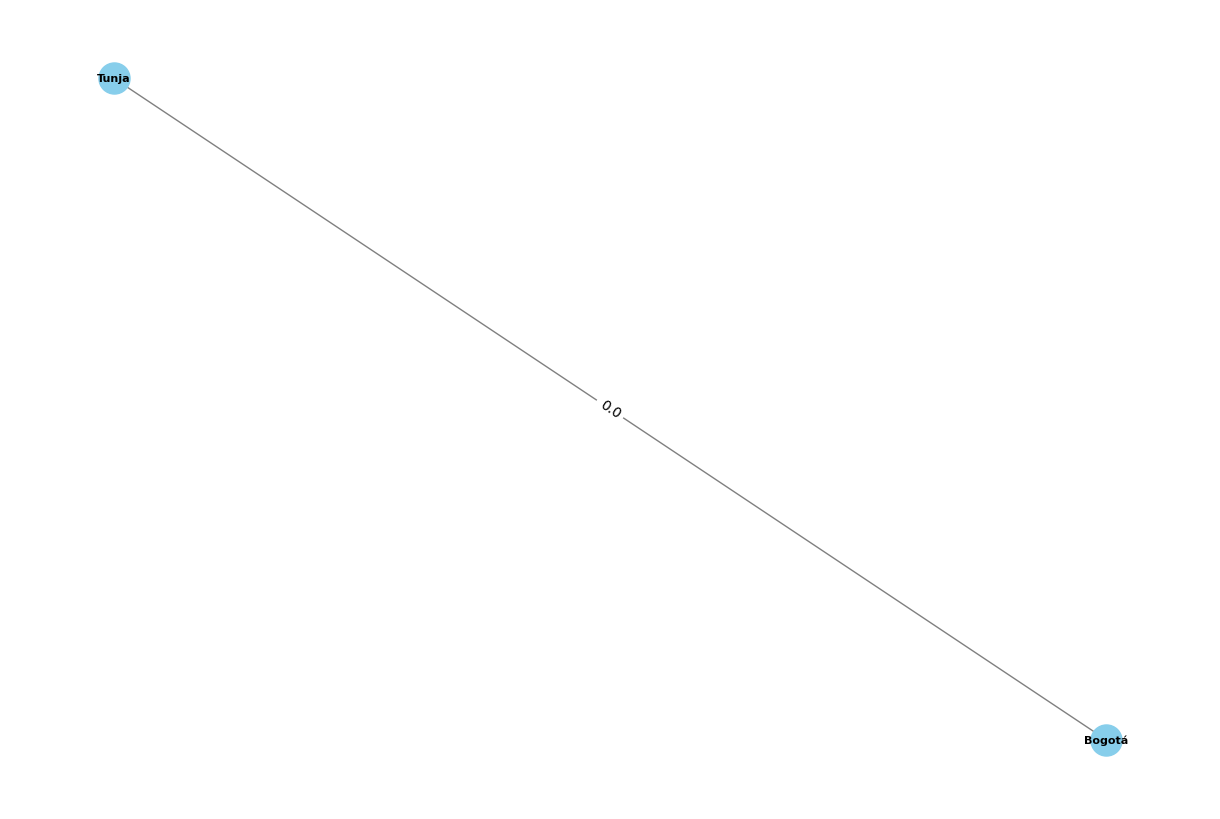

In [ ]:
# Mostramos el grafo con las conexiones hechas de manera automatica y aleatoria

plt.figure(figsize=(12, 8)) # Tamaño del lienzo que se usara para mostrar la visualización.
pos = nx.spring_layout(G_temperaturas)   # Posiciones de los nodos

# Dibujar el grafo
nx.draw(G_temperaturas, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

# Obtener valores de etiquetas en las aristas (vértices) del grafo
edge_labels = nx.get_edge_attributes(G_temperaturas, 'distancia')

# Dibujar los valores de la propiedad o etiqueta 'distancia' sobre el grafo
nx.draw_networkx_edge_labels(G_temperaturas, pos, edge_labels=edge_labels)

# Visualizar el grafo
plt.show()

In [ ]:
# Mostrar detalladamente cada nodo y sus nodos conectados

for nodo in G_temperaturas.nodes:
  print(f"\nNodo actual: {nodo}")
  # Si el nodo actual NO esta conectado a si mismo...
  if not G_temperaturas.has_edge(nodo, nodo):
    # Obtener una lista de los nodos 'vecinos' del nodo actual. Es decir, sus conexiones.
    lista_conexiones_nodo_actual:list = list(G_temperaturas.neighbors(nodo))
    for conexion in lista_conexiones_nodo_actual:
      print(f"\tConexion con nodo: {conexion}. Distancia: {G_temperaturas.get_edge_data(nodo, conexion)['distancia']} km")
  else:
    print("\tNo posee conexiones...")


Nodo actual: Bogotá
	Conexion con nodo: Tunja. Distancia: 0.0 km

Nodo actual: Tunja
	Conexion con nodo: Bogotá. Distancia: 0.0 km


In [ ]:
import math

# Cambiando los valores de distancia entre los nodos del grafo.

for nodo_a in G_temperaturas.nodes:
  # Solo cambiar el valor de la distancia entre un nodo a otro si el nodo NO esta conectado a si mismo.
  if not G_temperaturas.has_edge(nodo_a, nodo_a):

    # Filtrar el DataFrame para obtener el valor de las columnas 'longitud' y 'latitud' donde 'nombreestacion' es igual al nodo actual
    x_nodo_actual = data.loc[data['City'] == nodo_a, 'Longitude'].values[0]
    y_nodo_actual = data.loc[data['City'] == nodo_a, 'Latitude'].values[0]

    # Obtener una lista de los nodos 'vecinos' del nodo actual. Es decir, sus conexiones.
    lista_conexiones_nodo_actual:list = list(G_temperaturas.neighbors(nodo_a))
    for conexion in lista_conexiones_nodo_actual:

      # Filtrar el DataFrame para obtener el valor de las columnas 'longitud' y 'latitud' donde 'nombreestacion' es igual al nodo actual
      x_nodo_conexion = data.loc[data['City'] == conexion, 'Longitude'].values[0]
      y_nodo_conexion = data.loc[data['City'] == conexion, 'Latitude'].values[0]

      # Calcular la distancia que hay entre 2 puntos, donde se usan las corrdenadas, longitud(x) latitud(y).
      # d = √((x2 - x1)² + (y2 - y1)²)
      nueva_distancia:float = math.sqrt((math.pow(abs(x_nodo_actual-x_nodo_conexion), 2))+(math.pow(abs(y_nodo_actual-y_nodo_conexion), 2)))

      # Modificar el atributo de distancia entre 2 nodos.
      G_temperaturas[nodo_a][conexion]['distancia'] = round(nueva_distancia, 2)

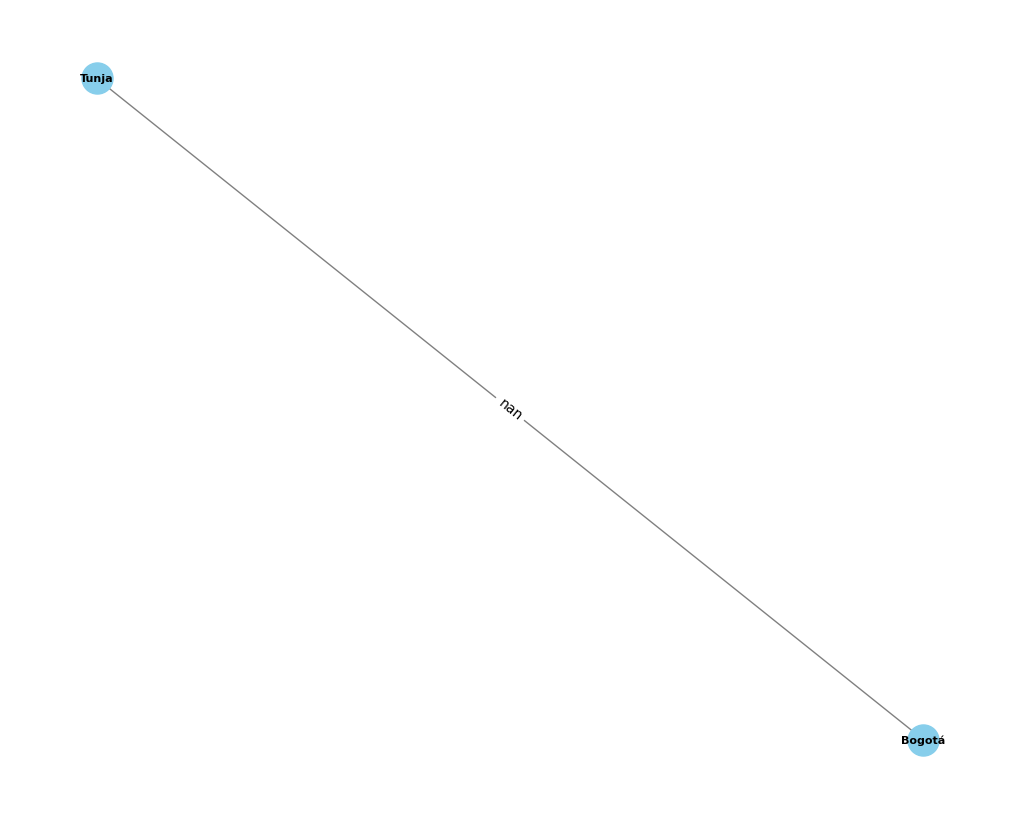

In [ ]:
# Mostrando el grafo luego de modificado el valor de la propiedad distancia de las conexiones de los nodos del grafo.

plt.figure(figsize=(10, 8)) # Tamaño del lienzo que se usara para mostrar la visualización.
pos = nx.spring_layout(G_temperaturas)   # Posiciones de los nodos

# Dibujar el grafo
nx.draw(G_temperaturas, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

# Obtener valores de etiquetas en las aristas (vértices) del grafo
edge_labels = nx.get_edge_attributes(G_temperaturas, 'distancia')

# Dibujar los valores de la propiedad o etiqueta 'distancia' sobre el grafo
nx.draw_networkx_edge_labels(G_temperaturas, pos, edge_labels=edge_labels)

# Visualizar el grafo
plt.show()